In [38]:
        %load_ext autoreload
%autoreload 2

from get_data import (get_merged_table, get_bohlin78, get_shull2021)
from plot_fuse_results import plot_results_scatter, match_comments, plot_results_fit
from matplotlib import pyplot as plt
from astropy.table import Column

plt.ioff()

import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 120
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get the data

### data for Gordon09 extinction curve sightlines

In [54]:
# data = get_merged_table()

# # add comments for certain stars here
# data.add_column(Column(['no'] * len(data), dtype='<U16', name='comment'))
# def set_comment(name, s):
#     data['comment'][data['Name'] == name] = s

# for name in ["HD200775", "HD164906", "HD045314", "HD206773"]:
#     set_comment(name, "lo_h_av")

# set_comment("HD096675", "hi_h_av")

# # write out in fits format so we can look at it in topcat
# data.write('merged_table.fits', overwrite=True)
# data

def set_comment(name, s):
    """Set the comment for a specific star to the string s."""
    data["comment"][data["Name"] == name] = s


# main data and comments to help marking some points
data = get_merged_table()
comp = get_merged_table(True)
data.add_column(Column(["none"] * len(data), dtype="<U16", name="comment"))

set_comment("HD096675", "hi_h_av")
# the 4 low outliers
for name in ["HD045314", "HD164906", "HD200775", "HD206773"]:
    set_comment(name, "lo_h_av")



Did not find absolute magnitude for B2Ve
Took 39 distances from Shull+21


/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:14: RuntimeWarning: overflow encountered in power
  lin = np.power(10.0, log)
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:15: RuntimeWarning: overflow encountered in power
  lin_unc = 0.5 * (np.power(10.0, log + log_unc) - np.power(10.0, log - log_unc))
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:15: RuntimeWarning: invalid value encountered in subtract
  lin_unc = 0.5 * (np.power(10.0, log + log_unc) - np.power(10.0, log - log_unc))


Took 8 distances from Shull+21
Did not find absolute magnitude for B2Ve
Took 39 distances from Shull+21


/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:14: RuntimeWarning: overflow encountered in power
  lin = np.power(10.0, log)
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:15: RuntimeWarning: overflow encountered in power
  lin_unc = 0.5 * (np.power(10.0, log + log_unc) - np.power(10.0, log - log_unc))
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:15: RuntimeWarning: invalid value encountered in subtract
  lin_unc = 0.5 * (np.power(10.0, log + log_unc) - np.power(10.0, log - log_unc))
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:165: RuntimeWarning: invalid value encountered in true_divide
  summed_result[f"nj{lo}"] / gi(lo) * gi(hi) / summed_result[f"nj{hi}"]
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:173: RuntimeWarning: invalid value encountered in true_divide
  log2_factor = np.square(np.log(nlo / nhi * gi(hi) / gi(lo)))
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:175: RuntimeWarning

Took 8 distances from Shull+21


/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:14: RuntimeWarning: overflow encountered in power
  lin = np.power(10.0, log)
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:15: RuntimeWarning: overflow encountered in power
  lin_unc = 0.5 * (np.power(10.0, log + log_unc) - np.power(10.0, log - log_unc))
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:15: RuntimeWarning: invalid value encountered in subtract
  lin_unc = 0.5 * (np.power(10.0, log + log_unc) - np.power(10.0, log - log_unc))
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:165: RuntimeWarning: invalid value encountered in true_divide
  summed_result[f"nj{lo}"] / gi(lo) * gi(hi) / summed_result[f"nj{hi}"]
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:173: RuntimeWarning: invalid value encountered in true_divide
  log2_factor = np.square(np.log(nlo / nhi * gi(hi) / gi(lo)))
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:175: RuntimeWarning

### data for Gordon09 comparision star sightlines

In [55]:
data_comp = get_merged_table(comp=True)

Took 8 distances from Shull+21


/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:14: RuntimeWarning: overflow encountered in power
  lin = np.power(10.0, log)
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:15: RuntimeWarning: overflow encountered in power
  lin_unc = 0.5 * (np.power(10.0, log + log_unc) - np.power(10.0, log - log_unc))
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:15: RuntimeWarning: invalid value encountered in subtract
  lin_unc = 0.5 * (np.power(10.0, log + log_unc) - np.power(10.0, log - log_unc))
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:165: RuntimeWarning: invalid value encountered in true_divide
  summed_result[f"nj{lo}"] / gi(lo) * gi(hi) / summed_result[f"nj{hi}"]
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:173: RuntimeWarning: invalid value encountered in true_divide
  log2_factor = np.square(np.log(nlo / nhi * gi(hi) / gi(lo)))
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:175: RuntimeWarning

### data for Bohlin 78 Copernicus sightlines

In [56]:
bohlin = get_bohlin78()

### Data for Shull 2021 sightlines

In [57]:
data_shull = get_shull2021()
data_shull
import numpy as np
i = np.argmax(data_shull['fh2'])
data_shull

Name,EBV,lognhi,lognh2,lognhtot,fh2,nhi,nh2,nhtot,NH_EBV
,mag,dex(1 / cm2),dex(1 / cm2),dex(1 / cm2),,dex(1 / cm2),dex(1 / cm2),dex(1 / cm2),dex(1 / cm2)
str13,float64,float64,float64,float64,float64,float64,float64,float64,float64
BD35d4258,0.31,21.24,19.56,21.26,0.04,1.7378008287493693e+21,3.6307805477010026e+19,1.81970085860999e+21,5.870002769709645e+21
BD53d2820,0.4,21.35,20.04,21.39,0.089,2.238721138568347e+21,1.0964781961431828e+20,2.4547089156850335e+21,6.136772289212583e+21
CPD-59deg2600,0.53,21.54,20.16,21.57,0.077,3.4673685045253096e+21,1.445439770745928e+20,3.715352290971728e+21,7.010098662210807e+21
CPD-59deg2603,0.46,21.43,20.13,21.47,0.091,2.691534803926914e+21,1.3489628825916504e+20,2.951209226666378e+21,6.41567223188343e+21
CPD-69deg1743,0.3,21.16,19.91,21.21,0.101,1.445439770745928e+21,8.128305161640994e+19,1.621810097358933e+21,5.40603365786311e+21
CPD-72deg1184,0.23,20.9,20.07,21.01,0.228,7.943282347242789e+20,1.1748975549395303e+20,1.0232929922807578e+21,4.449099966438077e+21
HD003827,0.02,20.55,17.48,20.55,0.0017,3.54813389233576e+20,3.019951720402019e+17,3.54813389233576e+20,1.7740669461678801e+22
HD05005A,0.41,21.4,20.22,21.45,0.117,2.5118864315095717e+21,1.6595869074375564e+20,2.818382931264449e+21,6.874104710401096e+21


# 1. Basic gas-to-dust slopes
## Gas-to-A(V)
- 4 strong outlieres in NH-AV relation. Including them breaks the fit. Effect on NH-E(B-V) is not that strong.
- Need to investigate these points, as they might also have a strong effect on the fit result of other plots.
- gas-to-A(V) narrower than gas-to-E(B-V)

------------------------------------------------------------------------
AV vs nhtot
------------------------------------------------------------------------
outlier iteration  0
outlier iteration  1
Solution
m, b_perp: 1.5729118741845073e+21 0.28353473938206314
m, b: 1.5729118741845073e+21 4.459751583178567e+20
chi2min: 50.16368958789782 or 0.687173829971203 per DOF
*** FIT RESULT ***
m = 1.57e+21 pm 9.73e+19
b = 4.46e+20 pm 1.10e+20
correlation = -0.94
VVV-auto outlier removal-VVV
+++ MC pearson result +++
raw:  rho = 0.79 +- 0.08 (6.46 sigma0)
 sigmas range = 4.64 - 5.81
avg:  rho = 0.64 +- 0.08 (5.23 sigma0)
 sigmas range = 4.64 - 5.81
median:  rho = 0.65 +- 0.08 (5.32 sigma0)
 sigmas range = 4.64 - 5.81
------------------------------------------------------------------------
AV vs nhi
------------------------------------------------------------------------
VVV-no outlier removal-VVV
+++ MC pearson result +++
raw:  rho = 0.29 +- 0.09 (2.53 sigma0)
 sigmas range = 1.19 - 2.78
avg:  

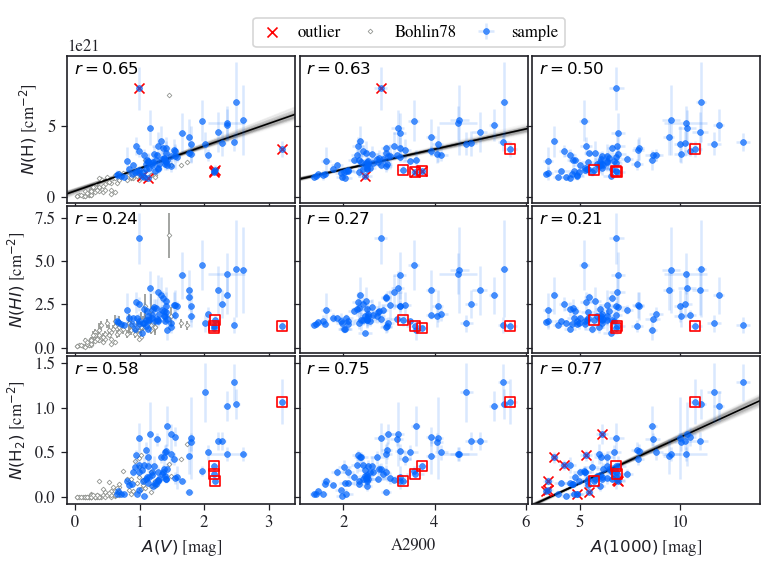

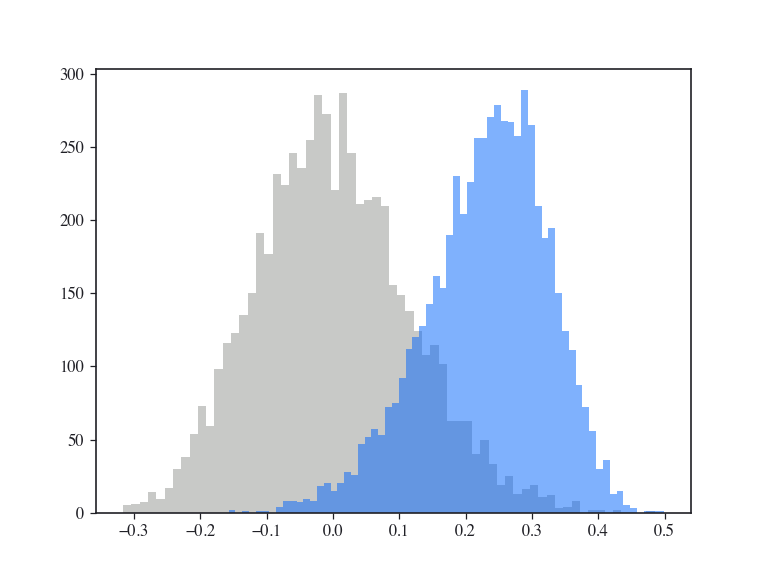

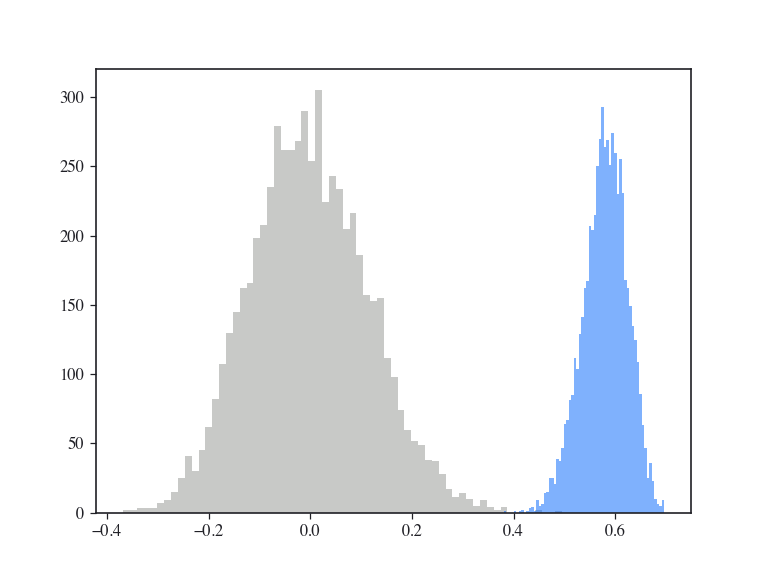

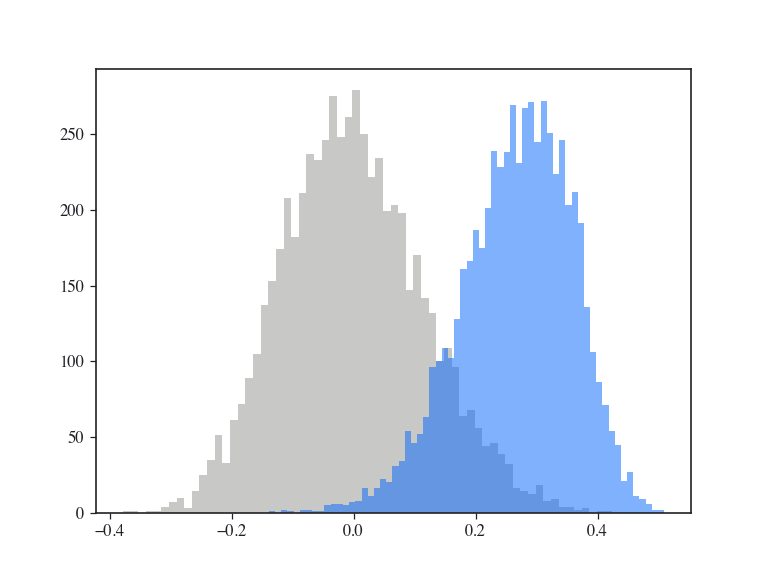

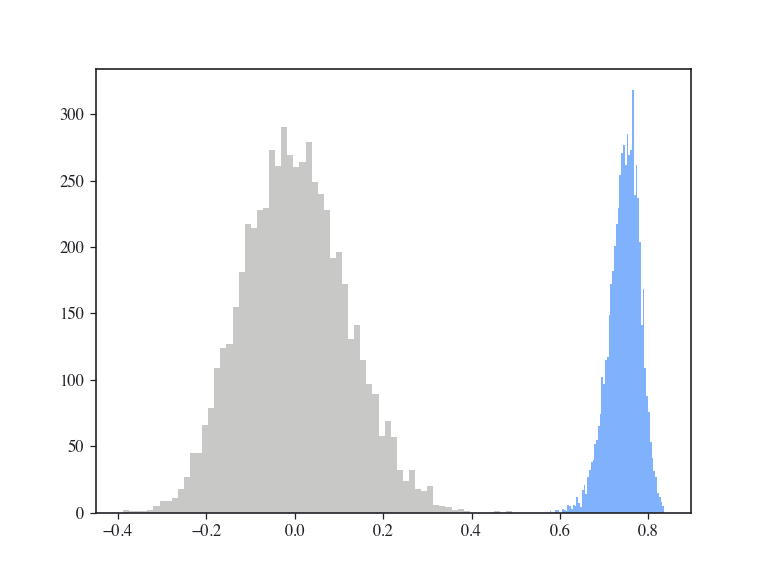

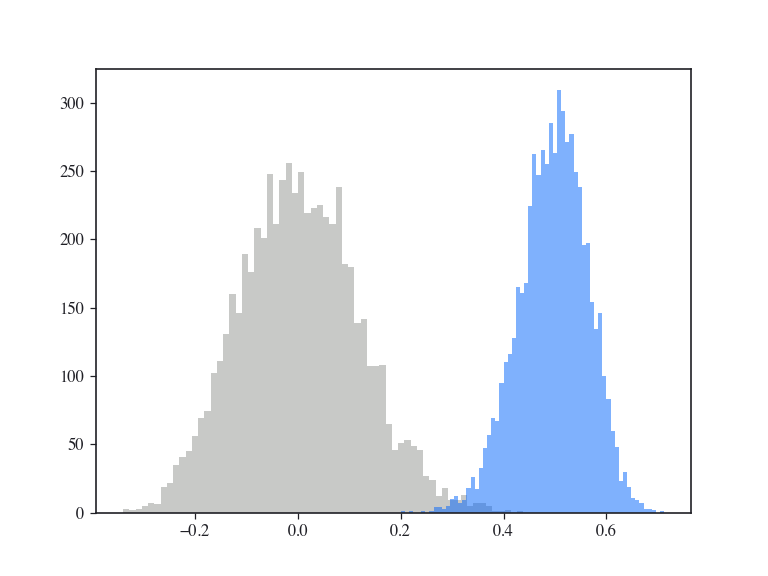

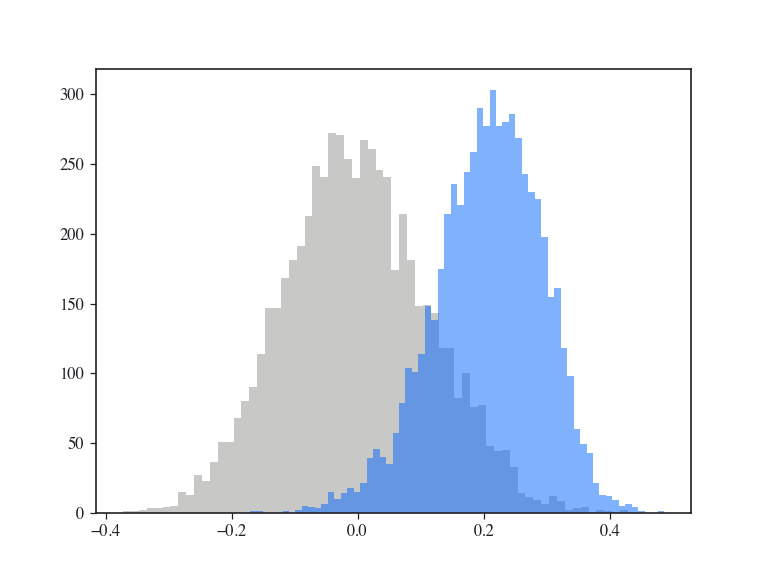

In [63]:
from paper_scatter import finalize_double_grid
OUTPUT_TYPE = "pdf"
MARK4 = True # switch to enable marking of low NH/AV points
if MARK4:
    MARK_STRING = ["lo_h_av"]
else:
    MARK_STRING = None
fig, axs = plt.subplots(3, 3, sharey="row", sharex="col")
#fig.set_size_inches(paper_rcparams.base_width, paper_rcparams.base_width)

# use these variables, so we can easily swap column and rows around
# col = {"AV": 0, "EBV": 1, "A1000": 2}
middle = "A2900"
col = {"AV": 0, middle: 1, "A1000": 2}
row = {"nhtot": 0, "nhi": 1, "nh2": 2}

def choose_ax(x, y):
    return axs[row[y], col[x]]

ax = choose_ax("AV", "nhtot")
xs, ys, covs = plot_results_scatter(
    ax,
    data,
    "AV",
    "nhtot",
    # data_comp=comp,
    data_bohlin=bohlin,
    # ignore_comments=["lo_h_av", "hi_h_av"],
    report_rho=False,
)
out = np.where(match_comments(data, ["lo_h_av", "hi_h_av"]))[0]
r = plot_results_fit(
    xs, ys, covs, ax, report_rho=True, outliers=out, auto_outliers=True
)
# print("AV vs nhtot outliers: ", data['name'][

ax = choose_ax("AV", "nhi")
xs, ys, covs = plot_results_scatter(
    ax,
    data,
    "AV",
    "nhi",
    # data_comp=comp,
    data_bohlin=bohlin,
    mark_comments=MARK_STRING,
)
ax = choose_ax("AV", "nh2")
xs, ys, covs = plot_results_scatter(
    ax,
    data,
    "AV",
    "nh2",
    # data_comp=comp,
    data_bohlin=bohlin,
    mark_comments=MARK_STRING,
)

ax = choose_ax(middle, "nhtot")
xs, ys, covs = plot_results_scatter(
    ax,
    data,
    middle,
    "nhtot",
    # data_comp=comp,
    data_bohlin=bohlin,
    mark_comments=MARK_STRING,
    # ignore_comments=["hi_h_av"],
    report_rho=False,
)
r = plot_results_fit(xs, ys, covs, ax, outliers=out, auto_outliers=True, report_rho=True)

ax = choose_ax(middle, "nhi")
xs, ys, covs = plot_results_scatter(
    ax,
    data,
    middle,
    "nhi",
    # data_comp=comp,
    data_bohlin=bohlin,
    mark_comments=MARK_STRING,
)

ax = choose_ax(middle, "nh2")
xs, ys, covs = plot_results_scatter(
    ax,
    data,
    middle,
    "nh2",
    # data_comp=comp,
    data_bohlin=bohlin,
    mark_comments=MARK_STRING,
)

ax = choose_ax("A1000", "nhtot")
xs, ys, covs = plot_results_scatter(
    ax,
    data,
    "A1000",
    "nhtot",
    data_bohlin=bohlin,
    mark_comments=MARK_STRING,
)

ax = choose_ax("A1000", "nhi")
xs, ys, covs = plot_results_scatter(
    ax,
    data,
    "A1000",
    "nhi",
    data_bohlin=bohlin,
    mark_comments=MARK_STRING,
)

ax = choose_ax("A1000", "nh2")
xs, ys, covs = plot_results_scatter(
    ax,
    data,
    "A1000",
    "nh2",
    data_bohlin=bohlin,
    mark_comments=MARK_STRING,
    report_rho=False,
)
r = plot_results_fit(
    xs,
    ys,
    covs,
    ax,
    auto_outliers=True,
    fit_includes_outliers=True,
    report_rho=True,
)
for ax in axs[1:, 0]:
    ax.yaxis.offsetText.set_visible(False)

axs[0][0].legend(bbox_to_anchor=(1.5, 1), loc="lower center", ncol=4)

fig.tight_layout()
finalize_double_grid(fig, axs, "column_vs_column_a2900")


In [ ]:
plt.figure()
xs, ys, covs = plot_results_scatter(
        plt.gca(),
        data,
        "AV",
        "nhtot",
        # data_comp=comp,
        # ignore_comments=["lo_h_av", "hi_h_av"],
        report_rho=True,
)
plt.show()

In [ ]:
fig1 = plot_results2(data, 'AV', 'denhtot', pxrange=[0.0,3.5], pyrange=[0.0,0.8e22],
            data_comp=data_comp, data_bohlin=data_bohlin78)
fig2 = plot_results2(data, 'AV', 'denhtot', pxrange=[0.0,3.5], pyrange=[0.0,0.8e22],
            data_comp=data_comp, data_bohlin=data_bohlin78, ignore_comments=['lo_h_av', 'hi_h_av'])

In [ ]:
_ = plot_results2(data, 'nhtot', 'nh2')

In [ ]:
_ = plot_results2(data, 'denhtot', 'denh2')

The number densities look related, but might not be as significant, because of the common distance factor, which  probably has a rather high uncertainty.

## Gas-to-E(B-V)


In [8]:
fig1 = plot_results2(data, 'EBV', 'nhtot', pyrange=[0.0,0.8e22],
            data_comp=data_comp, data_bohlin=data_bohlin78, data_shull=data_shull)
fig2 = plot_results2(data, 'EBV', 'nhtot', pyrange=[0.0,0.8e22],
            data_comp=data_comp, data_bohlin=data_bohlin78, data_shull=data_shull, ignore_comments=['hi_h_av'], mark_comments=['lo_h_av'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

EBV vs nhtot
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: 6.596686406212131e+21 -0.03288059515587082
m, b: 6.596686406212131e+21 -2.169029750928975e+20
chi2min: 46.326689049479135 or 0.6346121787599882 per DOF
Bootstrap: m = 6.795545285962435e+21 ; b = -0.037193032631244856
Bootstrap: sm = 7.847456681970876e+20 ; sb = 0.04104802984864419
Bootstrap: corr(m, b) = -0.9529875300317743
*** FIT RESULT ***
m = 6.60e+21 pm 5.94e+20
b = -2.17e+20 pm 3.33e-02
correlation  = -0.95
------------------


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

EBV vs nhtot
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: 6.60795905809259e+21 -0.035068421277047845
m, b: 6.60795905809259e+21 -2.317306920306752e+20
chi2min: 39.10793563990719 or 0.5431657727764887 per DOF
Bootstrap: m = 6.743225396697184e+21 ; b = -0.03832424339296258
Bootstrap: sm = 8.402293778761793e+20 ; sb = 0.046031439155606764
Bootstrap: corr(m, b) = -0.9491876569728416
*** FIT RESULT ***
m = 6.61e+21 pm 6.21e+20
b = -2.32e+20 pm 3.47e-02
correlation  = -0.95
------------------


/Users/dvandeputte/Projects/FUSE H2/data_analysis/plot_fuse_results.py:439: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ) = plt.subplots(figsize=(8, 5), ncols=2)


d vs nhtot
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
devs [-1.58508894  1.79762093  1.17875089  3.98285129  2.23778602  1.64949452
  1.75213186  1.66307441  1.21879322  2.20607935 -0.02142643  1.52336886
  1.50586426 -1.93421567  1.5428139   0.56713192  1.4488499   0.18423312
 -0.38717558 -1.05565122  2.149633    2.59071509 -2.8841209   4.53171249
  0.81896642  0.8241853   0.65668096  1.38955837 -4.42253265 -0.30184589
  0.67458893 -0.87927517 -3.38459214  1.58417563  1.20564876  2.09418932
  1.37608569  1.80000746  4.20362704  0.31621161  0.87738892  1.58442359
  1.65262138  1.11161058  1.44307551 -0.96461995 -0.74714784 -1.25667948
 -1.02819384  0.66337338 -0.52019795 -0.15235933  1.30903579 -1.04217581
  1.27159052  1.99

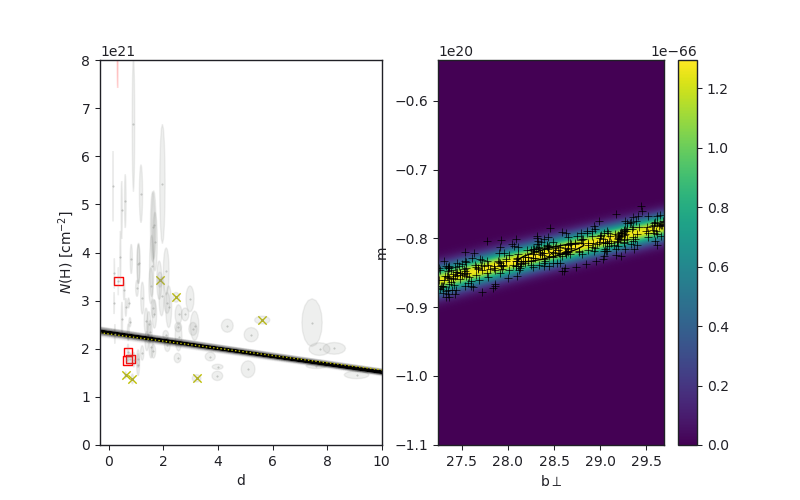

In [19]:
_ = plot_results2(data, 'd', 'nhtot', pyrange=[0.0,0.8e22],
           ignore_comments=['hi_h_av'], mark_comments=['lo_h_av'])

# 2. Gas-to-dust vs other things

## VS dust column and gas column

Before making any big conlusions here, the correlation between NH / AV and AV needs to be implemented properly. Preliminarily, we have:

### Using A(V)
The bad points mentioned above seem to pull down NH/AV - AV pretty badly. Not including them makes the downward slope insignificant. 

With them included:

NH-AV goes down with AV, but up with NH! Despite the fact that AV and NH have a well-defined slope in the plots above!

AV vs NH_AV
devs [-0.43141057  0.94868179  0.8460303   3.3045137   1.28346034  1.3015937
  1.46430899  1.34153468  0.62420121  2.90377345  0.55591224  1.02210519
  1.46137042 -3.5250998   1.25390505  0.71849136  1.06170943 -0.14434273
 -0.2421618  -0.13522274  2.24237054  2.09560673 -3.10351237  2.14767762
  0.4182702   0.8689579   0.58301731  1.94444758 -1.24547481 -0.77951658
  2.17139731 -1.18741631  1.44780368  0.19308458  0.74920366  1.85476078
  1.04189408  1.33089186  2.70094449  0.09767769  0.56322916  1.32820847
  0.79339845  0.83363247  0.81973809  0.4195148  -0.39276847 -0.61743209
 -2.18539245  0.58354072 -1.18741799 -0.75301964  1.1847896  -2.17550241
 -0.4184004   2.6549675  -0.33282546  0.78794856 -3.57502341  2.12784811
  0.63221058  0.25713811 -3.84534822 -0.30237893  2.70468602  2.19341939
  2.9565689  -5.02455922  2.17983772 -0.63425588  1.4689384   1.31918588
  1.31265205  0.07055029]
deviations of the order 1.711937212918551 1.63756893097224
outlier iteration  1
So

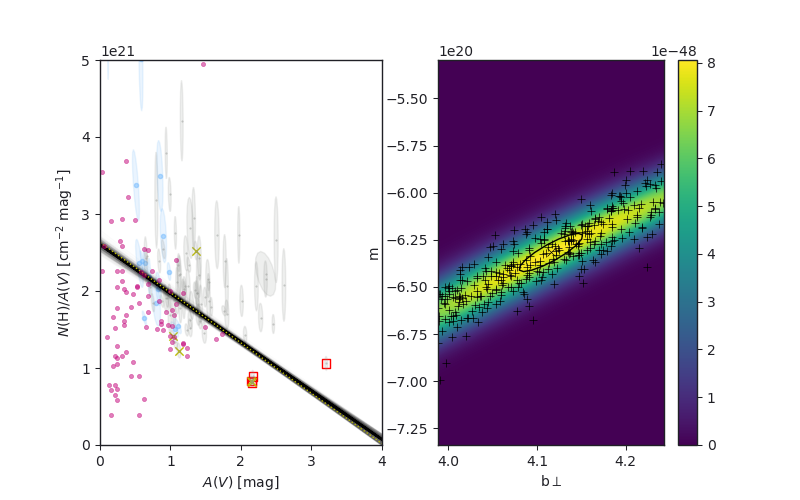

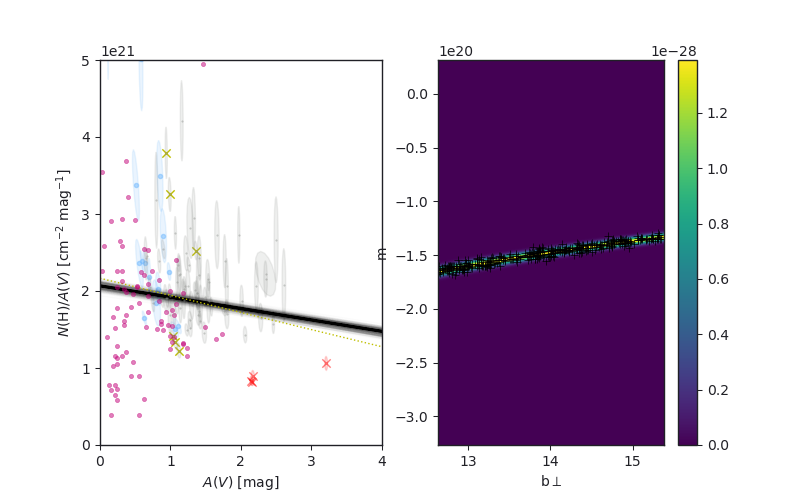

In [20]:
fig1 = plot_results2(data, 'AV', 'NH_AV', pyrange=[0.0,0.5e22], pxrange=[0,4],
            data_comp=data_comp,data_bohlin=data_bohlin78, ignore_comments=['hi_h_av'], mark_comments=['lo_h_av'])
fig1 = plot_results2(data, 'AV', 'NH_AV', pyrange=[0.0,0.5e22], pxrange=[0,4],
            data_comp=data_comp,data_bohlin=data_bohlin78, ignore_comments=['hi_h_av', 'lo_h_av'])
#fig2 = plot_results2(data, 'nhtot', 'NH_AV', pyrange=[0.0,0.5e22], pxrange=[0, 1.2e22],
 #           data_comp=data_comp,data_bohlin=data_bohlin78, ignore_comments=['hi_h_av'], mark_comments=['lo_h_av'])

### Using E(B-V)

In this case, the slope of NH / EBV is unclear, but NH / EBV does sem to go up with EBV!

In [11]:
fig1 = plot_results2(data, 'EBV', 'NH_EBV', pyrange=[0.0,1.5e22], pxrange=[-.1,1],
            data_comp=data_comp,data_bohlin=data_bohlin78, data_shull=data_shull, ignore_comments=['hi_h_av'], mark_comments=['lo_h_av'])
fig2 = plot_results2(data, 'nhtot', 'NH_EBV', pyrange=[0.0,1.5e22], pxrange=[0,1.2e22],
            data_comp=data_comp,data_bohlin=data_bohlin78, data_shull=data_shull, ignore_comments=['hi_h_av'], mark_comments=['lo_h_av'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

EBV vs NH_EBV
Solution
m, b_perp: 3.1173095179239387e+21 1.3414043504483708
m, b: 3.1173095179239387e+21 4.181572549037285e+21
chi2min: 37.71268656707428 or 0.5237873134315872 per DOF
Bootstrap: m = 2.7684752238101675e+21 ; b = 3.1153469285286803
Bootstrap: sm = 1.7680717799591764e+21 ; sb = 4.964913992469809
Bootstrap: corr(m, b) = -0.5400321995319335
*** FIT RESULT ***
m = 3.12e+21 pm 4.83e+20
b = 4.18e+21 pm 2.47e-01
correlation  = -0.97
------------------


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

nhtot vs NH_EBV
Solution
m, b_perp: 0.4138529800366905 4.0997928854929497e+21
m, b: 0.4138529800366905 4.4370183264227206e+21
chi2min: 38.36155301440196 or 0.5327993474222494 per DOF
Bootstrap: m = 0.42121018604694976 ; b = 4.0754833710765105e+21
Bootstrap: sm = 0.18411116295370847 ; sb = 8.019173439334512e+20
Bootstrap: corr(m, b) = -0.9846697695746535
*** FIT RESULT ***
m = 4.14e-01 pm 1.29e-01
b = 4.44e+21 pm 5.02e+20
correlation  = -0.97
------------------


## VS average grain size (RV)

RV vs NH_AV
devs [-0.17381319 -0.04923065 -0.07883374  1.11566149 -0.02584966  0.43333463
  0.44331968 -0.35641758 -1.72587254  1.64498384 -0.36194348  1.19284196
  1.23220513  0.66361747  0.18989142 -0.02701845  0.30895711  0.47915437
  0.31666026  0.07894044  1.8068216   0.30407014  0.01623333  1.12718911
  0.50941683  0.69366944  0.13253058  0.81153815 -0.10932789  0.06171101
  0.514222    0.16372009  0.59328156 -0.43779445 -0.68314042  2.37189365
  0.31269962  0.57119611  0.89789532  0.07539246  0.63395203  1.22084626
  0.16687236  1.1108597   0.08868845  0.35476913  0.46358236 -0.18954545
  1.17095062  0.71664938 -0.10750758 -0.05384592  0.78605312  0.04016
 -1.3571757   1.58578231 -0.89918672 -1.8707226  -0.28849945  0.67519579
 -1.40362327 -1.26237893 -1.77593172 -0.34413577  2.12385745  0.47311641
 -0.41749656 -0.11696052 -1.13979582 -0.87100369  0.47368759 -0.38298901
  0.25059752 -0.19663162]
deviations of the order 0.8639578934438582 0.8408358413071509
outlier iteration  1
S

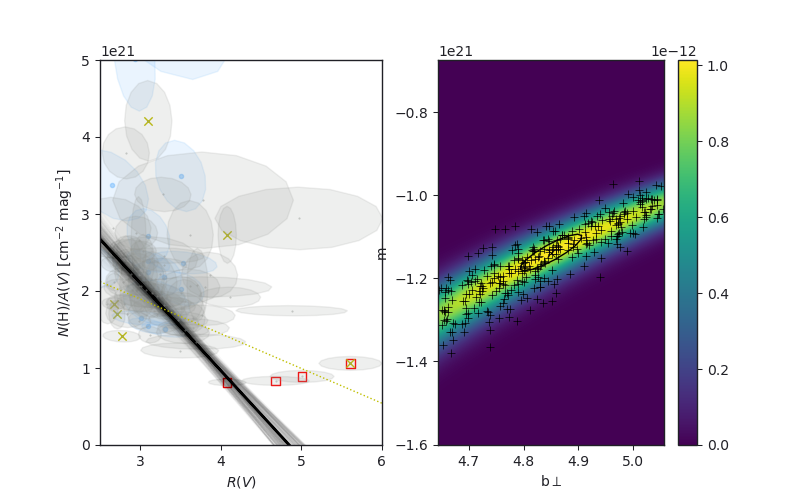

In [21]:
_ = plot_results2(data, 'RV', 'NH_AV', pxrange=[2.5,6.0], pyrange=[0.0,0.5e22],
            data_comp=data_comp, ignore_comments=['hi_h_av'], mark_comments=['lo_h_av'])

In [13]:
data['1_RV'].data

array([0.32679739, 0.33222591, 0.33557047, 0.32894737, 0.3257329 ,
       0.32894737, 0.34602076, 0.35335689, 0.36900369, 0.30487805,
       0.35842294, 0.243309  , 0.20120724, 0.21367521, 0.35335689,
       0.34722222, 0.31948882, 0.26525199, 0.28571429, 0.31152648,
       0.32258065, 0.27932961, 0.27100271, 0.20491803, 0.28169014,
       0.26455026, 0.28985507, 0.33444816, 0.33898305, 0.32154341,
       0.28818444, 0.34602076, 0.27322404, 0.30395137, 0.31545741,
       0.36231884, 0.24509804, 0.34013605, 0.2739726 , 0.3030303 ,
       0.3030303 , 0.28490028, 0.27624309, 0.29585799, 0.25906736,
       0.31746032, 0.31746032, 0.26246719, 0.31152648, 0.1996008 ,
       0.27624309, 0.32051282, 0.28328612, 0.26954178, 0.28089888,
       0.33444816, 0.35460993, 0.35714286, 0.37453184, 0.28653295,
       0.30864198, 0.32051282, 0.38610039, 0.36101083, 0.33783784,
       0.17825312, 0.31446541, 0.37593985, 0.24509804, 0.37313433,
       0.35335689, 0.33557047, 0.32894737, 0.37593985, 0.32467

1_RV vs NH_AV
Some covs don't satisfy Cauchy-Schwarz inequality! cov^2 !< Vx * Vy!
Fudging the correlation to 99% to avoid further problems.
devs [-0.33591914 -0.11733395 -0.09813515  1.71823497 -0.09804979  0.43417301
  0.45108803 -0.39056716 -1.80418517  2.18013712 -0.41425254  2.01590142
  2.64064277 -0.36260555  0.17956228 -0.05878472  0.35054387  0.79182151
  0.35036173  0.08532904  1.90678362  0.01215538 -0.30654808  3.70820219
  0.43898637  1.32460052  0.13020622  0.88880439 -0.20927711 -0.11352907
  0.62437427  0.04424582  1.86942754 -0.87167672 -1.23969581  2.01873931
  0.57406694  0.3565221   1.95631998  0.01031594  0.70614434  1.3242897
  0.11307333  1.25892702  0.06006949  0.59725134  1.15079059 -0.32530163
  0.57095376  0.84038509 -0.24467003 -0.41792441  0.63334706 -0.35457053
 -2.09767402  1.66716552 -1.43795298 -2.36878781 -1.25946088  0.67307443
 -2.13316484 -1.53681706 -2.55862669 -0.46661622  1.83519353  0.48201286
 -0.58312202 -2.11020617 -1.56526667 -1.17499298  0.

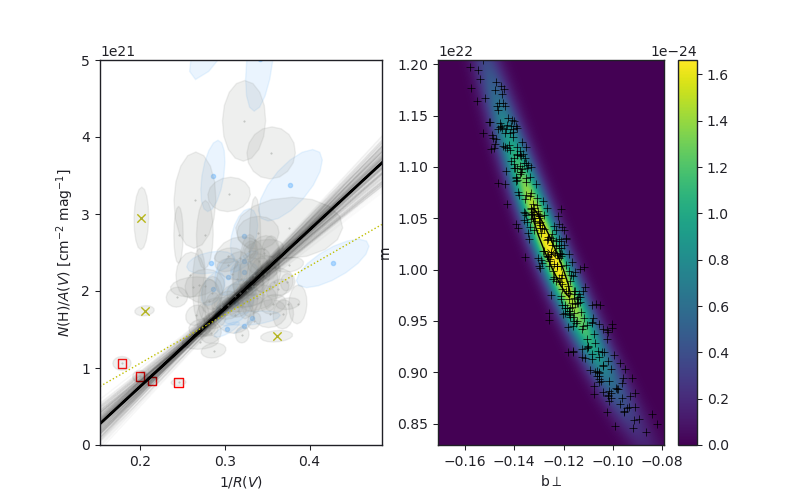

In [28]:
_ = plot_results2(data, '1_RV', 'NH_AV', pyrange=[0.0,0.5e22],
            data_comp=data_comp, ignore_comments=['hi_h_av'], mark_comments=['lo_h_av'])

## VS density (NH)

denhtot vs NH_AV
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
devs [ 0.37430225  1.04936076  0.22501404  2.63880158  0.84207597  0.67936902
  1.4258762   0.20452035 -0.5684952   2.59235405 -0.53648206 -0.39170254
  0.8159587   0.9505987   0.74136031  0.53354435 -1.00434117 -0.16177575
  0.2164719   1.7745677  -1.7935233  -2.27289694 -0.75999591  0.02960293
  1.10490627  0.7073814   0.4183495   0.19835615 -0.91019503  2.77476684
 -1.36025096  3.26202612 -0.58726994  0.81774227 -0.93682228  1.88490066
 -0.81861134  3.04218513 -0.12934951  0.24413941  0.8958705  -0.30929653
  0.57646827  0.47365504  1.11185939  1.02368978 -0.371

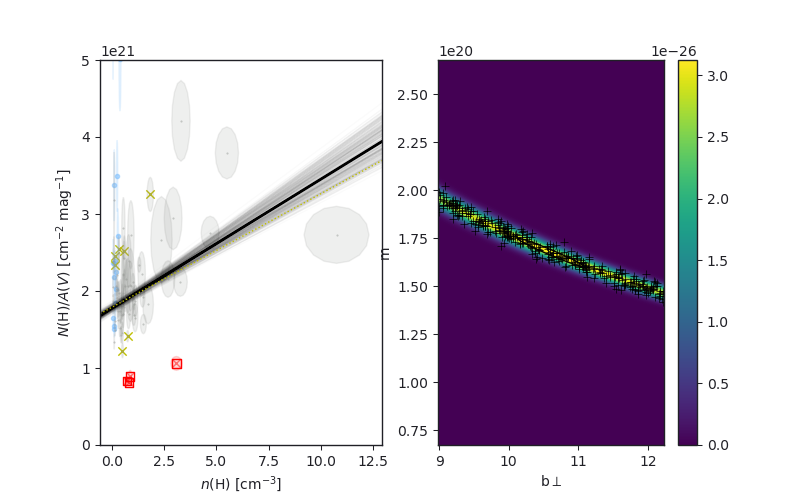

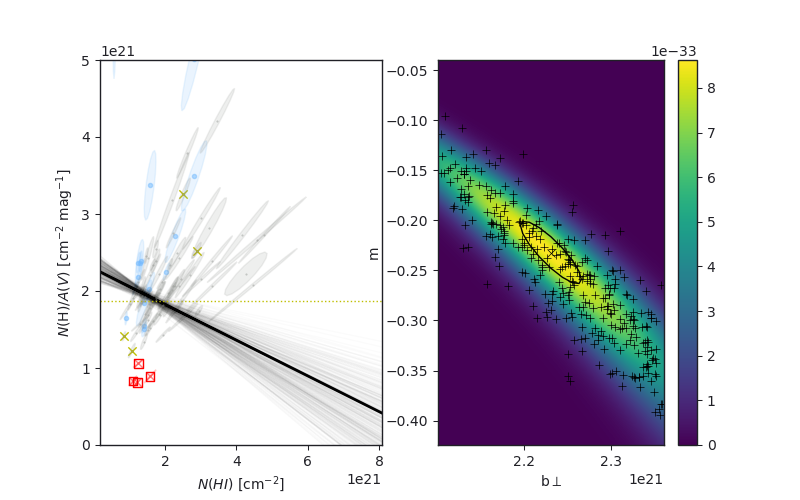

In [27]:
_ = plot_results2(data, 'denhtot', 'NH_AV', pyrange=[0.0,0.5e22],
            data_comp=data_comp, ignore_comments=['hi_h_av','lo_h_av'], mark_comments=['lo_h_av'])
_ = plot_results2(data, 'nhi', 'NH_AV', pyrange=[0.0,0.5e22],
            data_comp=data_comp, ignore_comments=['hi_h_av','lo_h_av'], mark_comments=['lo_h_av'])

## VS molecular fraction (fH2)
### Using A(V)

In [16]:
_ = plot_results2(data, 'fh2', 'NH_AV', pxrange=[0.0,0.7], pyrange=[0.0,1e22],
            data_comp=data_comp, data_bohlin=data_bohlin78, ignore_comments=['hi_h_av', 'lo_h_av'], mark_comments=['lo_h_av'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

fh2 vs NH_AV
Solution
m, b_perp: -2.3624080066737967e+19 79.68801181210827
m, b: -2.3624080066737967e+19 1.8825559714084068e+21
chi2min: 65.46818949717539 or 0.9627674926055204 per DOF
Bootstrap: m = 4.2426237641315525e+19 ; b = 12.460789658063316
Bootstrap: sm = 4.784646971360689e+20 ; sb = 28.611449180694102
Bootstrap: corr(m, b) = -0.031372031168571096
*** FIT RESULT ***
m = -2.36e+19 pm 2.36e+19
b = 1.88e+21 pm 3.26e+00
correlation  = 0.20
------------------


### Using E(B-V)

In [17]:
_ = plot_results2(data, 'fh2', 'NH_EBV', pxrange=[0.0,0.7], pyrange=[0.0,1.5e22],
            data_comp=data_comp, data_bohlin=data_bohlin78, data_shull=data_shull, ignore_comments=['hi_h_av'], mark_comments=['lo_h_av'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

fh2 vs NH_EBV
Solution
m, b_perp: -2.701106282970145e+21 2.3532140266775676
m, b: -2.701106282970145e+21 6.356281192632253e+21
chi2min: 38.00140313209355 or 0.5277972657235215 per DOF
Bootstrap: m = -2.8941508428494495e+21 ; b = 3.797725182133512
Bootstrap: sm = 1.790962222407639e+21 ; sb = 6.27532270319317
Bootstrap: corr(m, b) = 0.40365212727597144
*** FIT RESULT ***
m = -2.70e+21 pm 1.82e+20
b = 6.36e+21 pm 1.28e-01
correlation  = 0.92
------------------


# 3. Molecular fraction vs others 

E(B-V) seems a better predictor of fh2 than A(V)

## VS E(B-V) dust column

In [18]:
_ = plot_results2(data, 'EBV', 'fh2',
            data_comp=data_comp, data_bohlin=data_bohlin78, data_shull=data_shull, mark_comments=['lo_h_av'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

EBV vs fh2
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: 0.7487926552039731 -0.08229958191431982
m, b: 0.7487926552039731 -0.10281488973898296
chi2min: 73.88464947673333 or 1.0121184859826484 per DOF
Bootstrap: m = 0.7666604294518901 ; b = -0.08431740576704819
Bootstrap: sm = 0.13322728673722542 ; sb = 0.03100087397464387
Bootstrap: corr(m, b) = -0.9543120865111399
*** FIT RESULT ***
m = 7.49e-01 pm 5.68e-02
b = -1.03e-01 pm 1.66e-02
correlation  = -0.90
------------------


## VS A(V) dust column

In [19]:
_ = plot_results2(data, 'AV', 'fh2', data_comp=data_comp, data_bohlin=data_bohlin78, mark_comments=['hi_h_av', 'lo_h_av'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

AV vs fh2
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: 0.17358672376653098 -0.09248822311758775
m, b: 0.17358672376653098 -0.09387132520092646
chi2min: 260.24985241104946 or 3.565066471384239 per DOF
Bootstrap: m = 0.1458022804488375 ; b = -0.05591186122036241
Bootstrap: sm = 0.07937045389674485 ; sb = 0.07201513064020017
Bootstrap: corr(m, b) = -0.9615427955170534
*** FIT RESULT ***
m = 1.74e-01 pm 1.14e-02
b = -9.39e-02 pm 1.02e-02
correlation  = -0.92
------------------


## VS average grain size (RV)

In [20]:
_ = plot_results2(data, 'RV', 'fh2', pxrange=[2.0,6.0], pyrange=[0, 1], data_comp=data_comp, 
                  ignore_comments=['lo_h_av'], mark_comments=['hi_h_av'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

RV vs fh2
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: -0.3154099480051757 1.1851627748861298
m, b: -0.3154099480051757 1.2427173093331387
chi2min: 52.25571343477641 or 0.7573291802141509 per DOF
Bootstrap: m = 29.191493288647912 ; b = 1.0166340636089852
Bootstrap: sm = 206.4027064216075 ; sb = 0.834135665091203
Bootstrap: corr(m, b) = -0.712658565055342
*** FIT RESULT ***
m = -3.15e-01 pm 2.50e-02
b = 1.24e+00 pm 6.89e-02
correlation  = -0.98
------------------


1_RV vs fh2
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
devs [-2.18345925 -2.27986731  0.2229675  -1.73818186 -0.97008862 -0.47240363
 -0.73493649 -0.57871686  0.19121242  0.05168659  0.59573628  3.59107468
  3.41817077 -0.37448957 -0.38099671  0.0747526   1.24902768  0.68291347
  0.55693687  0.14725982  3.39344302 -0.95594015  1.40018706 -0.07823324
  0.21886705 -0.16971752  0.49902462 -0.41104054 -1.14255437  1.07927962
 -0.61522654  0.50950675 -1.37097416 -1.19945583 -1.61387548  1.12595318
 -2.29987804  1.99829233 -0.43945381 -0.31378256  0.77043598 -0.98703124
 -0.23068931  0.35412976  0.7764603  -1.32840916 -0.35039594

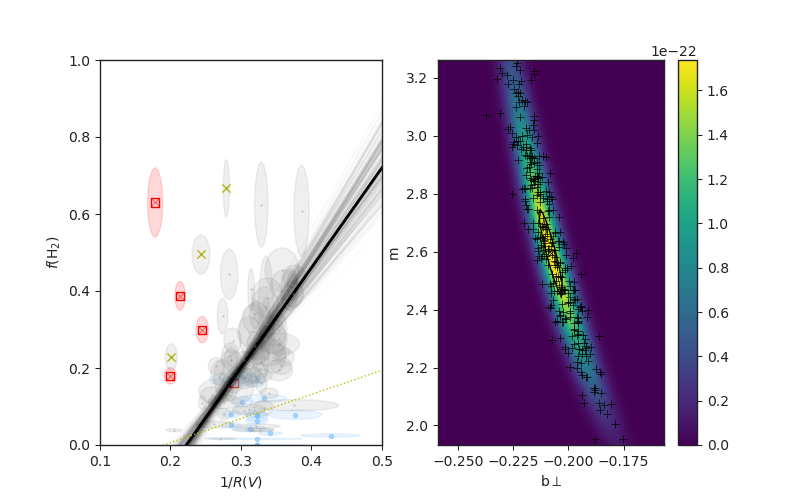

In [31]:
_ = plot_results2(data, '1_RV', 'fh2', pxrange=[.1, .5], pyrange=[0, 1], data_comp=data_comp, 
                  ignore_comments=['lo_h_av'], 
                  mark_comments=['hi_h_av','lo_h_av'])

# 4. Basic extinction relations

In [22]:
_ = plot_results2(data, 'EBV', 'RV', mark_comments=['lo_h_av'])

/Users/dvandeputte/Projects/FUSE H2/plotting_git/plot_fuse_results.py:425: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ) = plt.subplots(figsize=(8, 5), ncols=2)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

EBV vs RV
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: -0.8609083812877215 2.73747255331241
m, b: -0.8609083812877215 3.612181120794964
chi2min: 120.82953864782294 or 1.6551991595592184 per DOF
Bootstrap: m = -0.9287708324004261 ; b = 2.593833444028033
Bootstrap: sm = 0.9337006335986647 ; sb = 0.5434443839581836
Bootstrap: corr(m, b) = 0.7331412274741045
*** FIT RESULT ***
m = -8.61e-01 pm 9.67e-02
b = 3.61e+00 pm 8.94e-02
correlation  = 0.98
------------------


In [23]:
_ = plot_results2(data, 'AV', 'RV', mark_comments=['lo_h_av'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

AV vs RV
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: 0.240309989775073 2.6693975017784384
m, b: 0.240309989775073 2.7453931077335967
chi2min: 115.5603075810991 or 1.5830179120698507 per DOF
Bootstrap: m = 0.22627740754678696 ; b = 2.693409675649067
Bootstrap: sm = 0.11116580175927239 ; sb = 0.23049435887545258
Bootstrap: corr(m, b) = -0.9731695203293956
*** FIT RESULT ***
m = 2.40e-01 pm 4.82e-02
b = 2.75e+00 pm 1.08e-01
correlation  = -0.97
------------------


# Other ideas

longitude versus rv and distance versus rv (and versus fh2)

In [44]:
_ = plot_results2(data, 'denhtot', 'fh2', mark_comments=['lo_h_av'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

denhtot vs fh2
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.


/Users/dvandeputte/Projects/FUSE H2/plotting_git/covariance.py:44: UserWarning: Warning: converting a masked element to nan.
  corners = np.row_stack([position + vw * cos(a) + vh * sin(a) for a in angles])


No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: 1.1378065830019943e-22 0.0005538456720128016
m, b: 1.1378065830019943e-22 0.0005538456720128016
chi2min: 175.8938861220919 or 2.4095052893437248 per DOF
Bootstrap: m = 9.942484720572648e-23 ; b = 0.01379686545052994
Bootstrap: sm = 3.344439508401387e-23 ; sb = 0.02941008573293035
Bootstrap: corr(m, b) = -0.8564556191351218
*** FIT RESULT ***
m = 1.14e-22 pm 7.72e-24
b = 5.54e-04 pm 5.10e-03
correlation  = -0.54
------------------


In [47]:
_ = plot_results2(data, 'denhtot', '1_RV', mark_comments=['lo_h_av'], data_comp=data_comp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

denhtot vs 1_RV
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
No covariances implemented for this parameter pair. If x and y are uncorrelated, you can dismiss this.
Solution
m, b_perp: -3.1113985579697165e-05 0.3280010884897532
m, b: -3.1113985579697165e-05 0.3280010886485188
chi2min: 143.00068883043994 or 1.958913545622465 per DOF
Bootstrap: m = -2.9172880274689273e-05 ; b = 0.324867727523911
Bootstrap: sm = 2.6447675424375134e-05 ; sb = 0.015917939453451803
Bootstrap: corr(m, b) = -0.8835826131734774
*** FIT RESULT ***
m = -3.11e-05 pm 5.59e-06
b = 3.28e-01 pm 4.82e-03
correlation  = -0.77
------------------


COS FUV needs 2x10-13 ergs/blah blah

E140H for CO (maybe E140M), S/N 15...

E(B-V)/distance versus fH2.  Should also do A(V)/d.  Maybe n(H) as well.